In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
import seaborn as sns
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

### ML MODEL
from sklearn.model_selection import train_test_split #splitting data
from imblearn.over_sampling import SMOTE #importing important libraries for oversampling data
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, plot_precision_recall_curve


In [296]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [232]:
df.shape

(299, 13)

In [233]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
EVENT                       0
dtype: int64

In [234]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [235]:
df = df.drop('time',axis=1)

<h2>
<font color='black'>Correlacion con EVENT</font>
</h2>

In [313]:
corr = df.drop('EVENT', axis=1).apply(lambda x: x.corr(df['EVENT']))
corr

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
dtype: float64

In [246]:
corr.apply(abs).sort_values(ascending=False)

serum_creatinine            0.294278
ejection_fraction           0.268603
age                         0.253729
serum_sodium                0.195204
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
platelets                   0.049139
smoking                     0.012623
sex                         0.004316
diabetes                    0.001943
dtype: float64

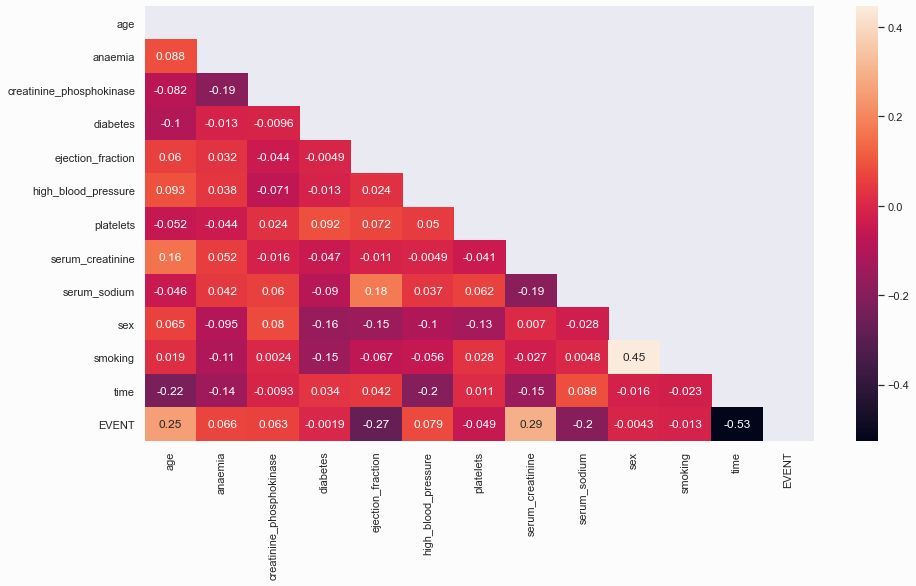

In [358]:
matrix = np.triu(df.corr())
plt.figure(figsize=(15,8),facecolor= '0.99')
sns.set(rc={'figure.facecolor':'1'})
sns.heatmap(df.corr(), annot=True, mask=matrix)
plt.savefig("correlation.png")

### Vemos que las 5 primeras variable guardan cierta correlacion con la variable DEATH_EVENT, asi que nos centraremos en dichas variables en este proyecto.

In [247]:
df_heart = df[['age','ejection_fraction', 'serum_creatinine','serum_sodium','high_blood_pressure','anaemia','EVENT']]

In [248]:
df_heart.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,high_blood_pressure,anaemia,EVENT
0,75.0,20,1.9,130,1,0,1
1,55.0,38,1.1,136,0,0,1
2,65.0,20,1.3,129,0,0,1
3,50.0,20,1.9,137,0,1,1
4,65.0,20,2.7,116,0,1,1


<h2>
<font color='black'>Análisis de las Variables Continuas</font>
</h2>

In [370]:
columns = ['age','ejection_fraction','serum_creatinine','serum_sodium']
fig = make_subplots(rows=2, cols=2, shared_yaxes=True,
    subplot_titles=("Heart Failure vs Age", "Heart Failure vs Ejection Fraction",
                    "Heart Failure vs Serum Creatinine", "Heart Failure vs Serum Sodium", "Death vs Time"
                   ))
for i in range(int(len(columns)/2)):

    fig.add_trace(go.Box(x=df[df['EVENT']==0][columns[2*i]], name='No Falleció',
                    marker_color = 'indianred'),row=i+1, col=1)

    fig.add_trace(go.Box(x=df[df['EVENT']==1][columns[2*i]], name = 'Falleció',
                    marker_color = 'lightseagreen'),row=i+1, col=1)
    
    fig.update_xaxes(title_text=columns[2*i], row=i+1, col=1)
    
    if not i==2 : 
        fig.add_trace(go.Box(x=df[df['EVENT']==0][columns[2*i +1]], name='No Falleció',
                        marker_color = 'indianred'),row=i+1, col=2)

        fig.add_trace(go.Box(x=df[df['EVENT']==1][columns[2*i +1]], name = 'Falleció',
                        marker_color = 'lightseagreen'),row=i+1, col=2)

        fig.update_xaxes(title_text=columns[2*i +1], row=i+1, col=2)

    fig.update_layout(height=600, width=1000,
                      title_text="Análisis de las Variable Continuas",showlegend=False)
fig.show()


In [210]:
numerical_index = ['ejection_fraction','serum_creatinine','serum_sodium']

In [211]:
df_heart[numerical_index].skew()

ejection_fraction    0.555383
serum_creatinine     4.455996
serum_sodium        -1.048136
dtype: float64

In [212]:
df_heart=df_heart[df_heart['ejection_fraction']<65]
df_heart=df_heart[df_heart['serum_creatinine']<3]
df_heart=df_heart[df_heart['serum_sodium']>126] #removing outliers in serum_sodium

In [213]:
df_heart[numerical_index].skew()

ejection_fraction    0.438989
serum_creatinine     1.502528
serum_sodium        -0.057081
dtype: float64

In [381]:
high_blood_pressure = df_heart['high_blood_pressure'].value_counts().tolist()
death = ['No Heart Failure', 'Heart Failure']
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=death, values=high_blood_pressure, hole=.3,)])
fig.update_layout(
    width=600,
    height=500,
    title_text="Relación entre la Presión Arterial con un Problema en el Corazón",)
fig.show()

In [382]:
high_blood_pressure = df_heart['anaemia'].value_counts().tolist()
death = ['No anaemia', 'anaemia']
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=death, values=high_blood_pressure, hole=.3, )])
fig.update_layout(
    width=600,
    height=500,
    title_text="Relación entre la Anemia con un Problema en el Corazón",)
fig.show()

In [257]:
df_heart.to_csv ('heart_disease_new.csv',index=False)

# Test Machine Learning Model

## Random Forest with GridSearch

In [260]:
x = df_heart[[c for c in df_heart.columns if c != 'EVENT']] #separating features
y = df_heart['EVENT']#separating target

In [385]:
df_heart['EVENT'].value_counts()

0    203
1     96
Name: EVENT, dtype: int64

In [261]:
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)
smote = SMOTE(random_state = 11) 
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [262]:
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_smote))

Original dataset shape Counter({0: 160, 1: 79})
Resample dataset shape Counter({1: 160, 0: 160})


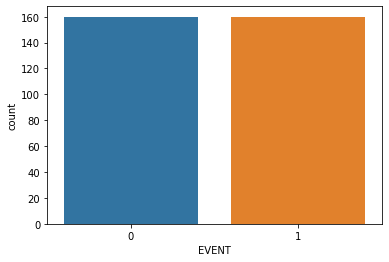

In [263]:
g = sns.countplot(y_train_smote) #again plotting for imbalance
g.set_xticklabels(['0','1'])
plt.show()

In [264]:
final_rf = RandomForestClassifier(random_state=11)

In [265]:
parameters ={
    "n_estimators":[100,500,1000,5000],
    "criterion":["gini","entropy"]
}

In [266]:
gscv = GridSearchCV(estimator=final_rf,param_grid= parameters,cv=5,n_jobs=-1,scoring="f1_weighted")
gscv.fit(X_train_smote,y_train_smote)
FINAL_MODEL = gscv.best_estimator_

In [267]:
FINAL_MODEL.score(X_train_smote,y_train_smote)

1.0

In [268]:
train_pred = FINAL_MODEL.predict(X_train_smote)
print(classification_report(y_train_smote,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       160

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [269]:
FINAL_MODEL.score(X_test,y_test) #Test set score

0.7166666666666667

## Predict Score

In [270]:
pred = FINAL_MODEL.predict(X_test)

In [271]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        43
           1       0.50      0.53      0.51        17

    accuracy                           0.72        60
   macro avg       0.65      0.66      0.66        60
weighted avg       0.72      0.72      0.72        60



## Identifying Overfitting With Learning Curve

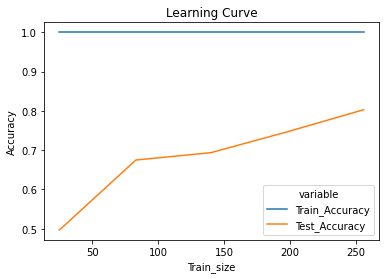

In [272]:
train_size,train_acc,test_acc = learning_curve(FINAL_MODEL, X_train_smote,y_train_smote,cv=5)
learn_df = pd.DataFrame({"Train_size":train_size,"Train_Accuracy":train_acc.mean(axis=1),"Test_Accuracy":test_acc.mean(axis=1)}).melt(id_vars="Train_size")
sns.lineplot(x="Train_size",y="value",data=learn_df,hue="variable")
plt.title("Learning Curve")
plt.ylabel("Accuracy");

### El modelo tiene overfitting en sus datos de entrenamiento
El sobreajuste puede deberse a que se utiliza un conjunto de entrenamiento muy pequeño. Como se ve en la curva de aprendizaje, agregar ejemplos adicionales al conjunto de entrenamiento mejorará el rendimiento del modelo en datos invisibles.

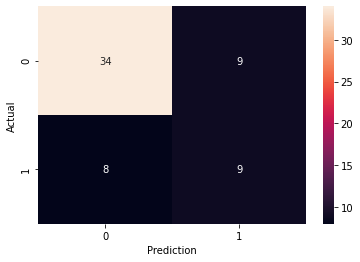

In [273]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)
plt.ylabel("Actual")
plt.xlabel("Prediction");

# Final Machine Learning Model

## Overcoming Overfitting

### Como se mencionó anteriormente, agregar ejemplos de entrenamiento puede evitar el sobreajuste, pero no tenemos la opción de agregar más ejemplos de entrenamiento. Por lo tanto, necesitamos hacer otra cosa.

### Ajustar algunos hiperparámetros nos ayuda a superar el sobreajuste

In [274]:
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)
smote = SMOTE(random_state = 11) 
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [275]:
#final_rf = RandomForestClassifier(random_state=11)

In [276]:
#final_parameters ={
#    "n_estimators":[5000,7000],
#    "criterion":["gini","entropy"],
#    "max_depth":[3,5,7],
#    "min_samples_split":[80,100],
#    "min_samples_leaf":[40,50],
#}

In [277]:
#gscv = GridSearchCV(estimator=final_rf, param_grid=final_parameters, cv=5,n_jobs=-1, scoring="f1_weighted")
#gscv.fit(X_train_smote,y_train_smote)
#FINAL_MODEL = gscv.best_estimator_

In [278]:
#FINAL_MODEL
#RandomForestClassifier(max_depth=3, min_samples_leaf=40, min_samples_split=80, n_estimators=7000, random_state=11)

In [279]:
#gscv.best_score_

In [280]:
final_rf = RandomForestClassifier(max_depth=3, min_samples_leaf=40, min_samples_split=80,
                       n_estimators=7000, random_state=11)

In [281]:
FINAL_MODEL = final_rf.fit(X_train_smote,y_train_smote)

In [282]:
FINAL_MODEL.score(X_train_smote,y_train_smote)

0.8

## Learning Curve

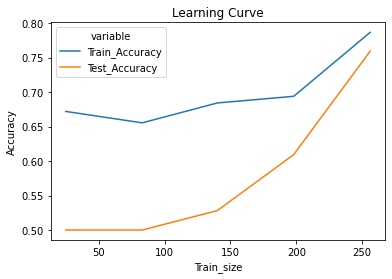

In [283]:
train_size,train_acc,test_acc = learning_curve(FINAL_MODEL, X_train_smote,y_train_smote,cv=5)
learn_df = pd.DataFrame({"Train_size":train_size,"Train_Accuracy":train_acc.mean(axis=1),"Test_Accuracy":test_acc.mean(axis=1)}).melt(id_vars="Train_size")
sns.lineplot(x="Train_size",y="value",data=learn_df,hue="variable")
plt.title("Learning Curve")
plt.ylabel("Accuracy");

### Ahora vemos que el modelo no está sobreajustado al conjunto de entrenamiento. Esto es porque:


<ol>
  <li>Seleccionamos una gran cantidad de n_estimators, lo que hace que crezcan más árboles, evitando así el sobreajuste.</li>
  <li>Evitamos que el árbol creciera eligiendo un número bajo para 'max_depth'.</li>
  <li>Seleccionamos números grandes para 'max_samples_split' y 'max_samples_leaf', lo que garantiza que la hoja tenga un buen número de muestras.</li> 
</ol>

In [284]:
train_pred = FINAL_MODEL.predict(X_train_smote)
print(classification_report(y_train_smote,train_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.79       160
           1       0.79      0.82      0.80       160

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



## Metrics of the final model

In [285]:
FINAL_MODEL.score(X_test,y_test) #Test set score

0.7833333333333333

In [286]:
pred = FINAL_MODEL.predict(X_test)

In [287]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        43
           1       0.60      0.71      0.65        17

    accuracy                           0.78        60
   macro avg       0.74      0.76      0.75        60
weighted avg       0.80      0.78      0.79        60



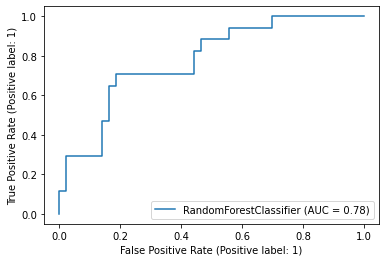

In [288]:
plot_roc_curve(FINAL_MODEL, X_test, y_test)
plt.show()

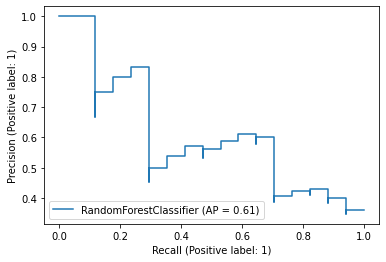

In [289]:
plot_precision_recall_curve(FINAL_MODEL, X_test, y_test)
plt.show()

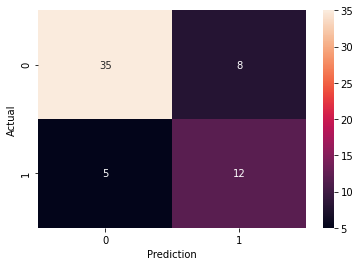

In [290]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)
plt.ylabel("Actual")
plt.xlabel("Prediction");

In [299]:
values = df_heart.values.tolist()
prediction = []
for i in range(len(values)):
    arr = values[i]
    arr = arr[0:-1]
    arr = np.array(arr)
    arr = arr.reshape((1,-1))
    out = FINAL_MODEL.predict(arr)[0]
    if out == 0:
        prediction.append('False')
    else:
        prediction.append('True')
        

In [300]:
df_not_failure = df_heart.copy()

In [301]:
df_not_failure['Predictions'] =  prediction
df_not_failure.head(50)

,age,ejection_fraction,serum_creatinine,serum_sodium,high_blood_pressure,anaemia,EVENT,Predictions
0,75.0,20,1.90,130,1,0,1,True
1,55.0,38,1.10,136,0,0,1,False
2,65.0,20,1.30,129,0,0,1,True
3,50.0,20,1.90,137,0,1,1,True
4,65.0,20,2.70,116,0,1,1,True
5,90.0,40,2.10,132,1,1,1,True
6,75.0,15,1.20,137,0,1,1,True
7,60.0,60,1.10,131,0,1,1,False
8,65.0,65,1.50,138,0,0,1,False
9,80.0,35,9.40,133,1,1,1,True


In [302]:
df_not_failure['Predictions'].value_counts()

False    182
True     117
Name: Predictions, dtype: int64